In [1]:
import robot_motion as rm
import robot_camera
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
import os
import numpy as np

robocam = robot_camera.robo_camera()

In [2]:
#connect to the robot
motionsystem = rm.colonyPicker({},{},'/dev/serial0',19200)

In [3]:
#take calibration images
motionsystem.move_robot(px=motionsystem.robopos["neutral_position"]["0"]["X"],\
                        py = motionsystem.robopos["neutral_position"]["0"]["Y"],\
                        pz=motionsystem.robopos["neutral_position"]["0"]["Z"])
motionsystem.send_gcode_multiline(["M400"])
motionsystem.light_on()
img = robocam.capture(os.path.join(".","calibration","lighttable.png")) #blank light table photo
zup = 2
square_radius  = 10

motionsystem.move_needle("backlit_plate","needle_pos",retract = False, offset_x = square_radius,offset_y = -square_radius,offset_z = zup)
motionsystem.send_gcode_multiline(["M400"])
img = robocam.capture(os.path.join(".","calibration","needlepos1.png"))
motionsystem.move_needle("backlit_plate","needle_pos",retract = False, offset_x = square_radius,offset_y = square_radius,offset_z=zup)
motionsystem.send_gcode_multiline(["M400"])
img = robocam.capture(os.path.join(".","calibration","needlepos2.png"))
motionsystem.move_needle("backlit_plate","needle_pos",retract = False, offset_x = -square_radius, offset_y = square_radius,offset_z=zup)
motionsystem.send_gcode_multiline(["M400"])
img = robocam.capture(os.path.join(".","calibration","needlepos3.png"))
motionsystem.move_needle("backlit_plate","needle_pos",retract = False, offset_x = -square_radius, offset_y = -square_radius,offset_z=zup)
motionsystem.send_gcode_multiline(["M400"])
img = robocam.capture(os.path.join(".","calibration","needlepos4.png"))
motionsystem.light_off()

NameError: name 'motionsystem' is not defined

In [3]:
#calibration with already taken images
ltable = os.path.join(".","calibration","lighttable.png")
npos1 = os.path.join(".","calibration","needlepos1.png")
npos2 = os.path.join(".","calibration","needlepos2.png")
npos3 = os.path.join(".","calibration","needlepos3.png")
npos4 = os.path.join(".","calibration","needlepos4.png")
needle_pics = [npos1,npos2,npos3,npos4]
needle_middle = [rm.colonyPicker.load_posfile(posfilename="robot_positions.csv")["needle_pos"]["backlit_plate"]["X"],
             rm.colonyPicker.load_posfile(posfilename="robot_positions.csv")["needle_pos"]["backlit_plate"]["Y"]]

square_radius  = 10
needle_pos = [(needle_middle[0]+square_radius,needle_middle[1]-square_radius),
              (needle_middle[0]+square_radius,needle_middle[1]+square_radius),
              (needle_middle[0]-square_radius,needle_middle[1]+square_radius),
              (needle_middle[0]-square_radius,needle_middle[1]-square_radius)]


needle_dict = {a[0]:a[1] for a in zip(needle_pics,needle_pos)}

img_tf,vector_tf = robocam.needle_jog_calibration(ltable,needle_dict)

test_point = np.array([150,350],np.float32)
new_point = np.dot(test_point,vector_tf)

print(img_tf)
print(needle_middle)
print(new_point)

[[150. 350.]
 [300. 350.]]
[[268.5 147. ]
 [268.5 167. ]]
[[ 1.15566025e+00  1.53680694e-01 -8.92056044e+02]
 [ 2.13090584e-02  1.71553175e+00 -5.44024358e+02]
 [ 1.52752372e-05  6.82799005e-04  1.00000000e+00]]
[258.5, 157.0]
[268.5 147. ]


In [ ]:
motionsystem = rm.colonyPicker({},{},'/dev/serial0',19200)

#take a picture of a plate

impath = os.path.join(".","pictures","sharpie_dots.png")

motionsystem.get_plate("A1")
motionsystem.put_plate("0","plate_backlight","up")
motionsystem.grab_lid()
#go up after grabbing the lid to avoid the induction heater
motionsystem.move_robot(pz = 68)
#move back so the camera can see the plate
motionsystem.move_robot(px=motionsystem.robopos["neutral_position"]["0"]["X"])
motionsystem.light_on(.7) #lights on
motionsystem.send_gcode_multiline(["M400"]) #wait for movement before the next part
platepic = robocam.capture(savepath=impath) #take a picture
motionsystem.light_off() #done taking a picture so light off
motionsystem.place_lid() #replace the lid
motionsystem.get_plate("0","plate_backlight","up") #pick up the plate
motionsystem.put_plate("A1") #store it in the right place

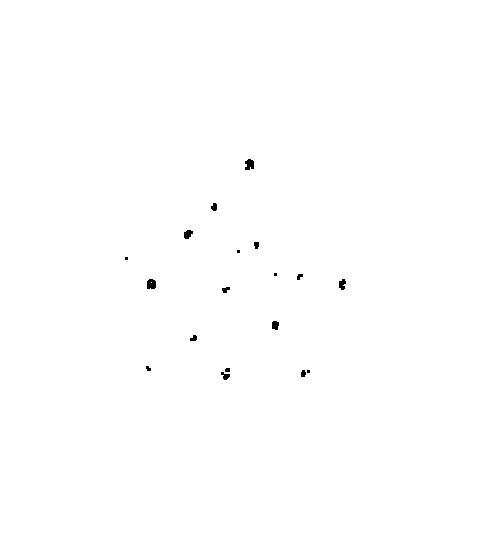

[]


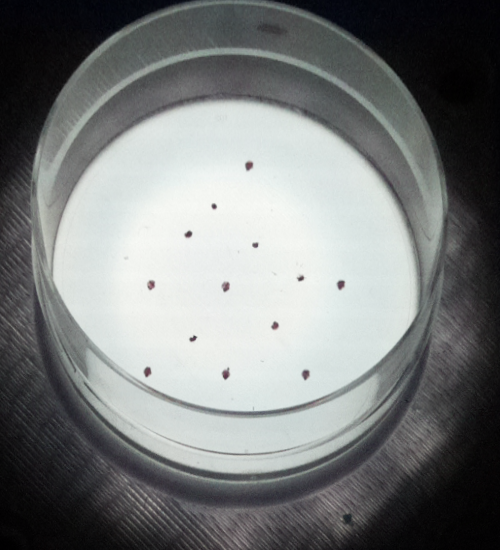

agar to rim distance is 38


In [3]:
import matplotlib.pyplot as plt
import peakutils.peak
threshold = 1

#imlist = ["A1_calib.png","A2_calib.png","A3_calib.png","B1_calib.png","B1_empty.png","B2_empty.png","B3_empty.png"]
imlist = ["sharpie_dots.png"]
ltable = os.path.join(".","calibration","lighttable.png")
npos1 = os.path.join(".","calibration","needlepos1.png")
npos2 = os.path.join(".","calibration","needlepos2.png")
npos3 = os.path.join(".","calibration","needlepos3.png")
npos4 = os.path.join(".","calibration","needlepos4.png")
needle_pics = [npos1,npos2,npos3,npos4]
needle_middle = [rm.colonyPicker.load_posfile(posfilename="robot_positions.csv")["needle_pos"]["backlit_plate"]["X"],
             rm.colonyPicker.load_posfile(posfilename="robot_positions.csv")["needle_pos"]["backlit_plate"]["Y"]]

square_radius  = 10
needle_pos = [(needle_middle[0]+square_radius,needle_middle[1]-square_radius),
              (needle_middle[0]+square_radius,needle_middle[1]+square_radius),
              (needle_middle[0]-square_radius,needle_middle[1]+square_radius),
              (needle_middle[0]-square_radius,needle_middle[1]-square_radius)]


needle_dict = {a[0]:a[1] for a in zip(needle_pics,needle_pos)}

img_tf,vector_tf = robocam.needle_jog_calibration(ltable,needle_dict)




for impath in imlist:
    kp = robocam.detect_colonies(impath,img_tf,vector_tf,True,False)
    if(len(kp)>0):
        print(kp[0].pt, kp[0].size)

    
#cv2.imwrite('testimage.png',warp)
#display(Image(filename='testimage.png'))